<a href="https://colab.research.google.com/github/dlrjswn179/dlrjswn179/blob/main/%EB%B9%84%EA%B5%90%EA%B3%BC_%EB%85%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1주차

**기초**

In [ ]:
print("Hello World")

In [ ]:
a = 123

In [ ]:
a

In [ ]:
type(a)

In [ ]:
a = "123"

In [ ]:
a

In [ ]:
type(a)

In [ ]:
#List
a = [1,2,3]
b = ["1","2","3"]
c = [1,"1",a]

#Tuple(수정불가능)
d = (1,2,3)
e = "1","2","3"
f = (1,"1",a)

#Set(순서없음)
g = {1,2,3}

#Dictionary
h = {'a':1,'b':2,'c':3}

In [ ]:
c[2]

In [ ]:
e

In [ ]:
g[2]
#Set은 순서가 없기 때문

In [ ]:
h[0]

In [ ]:
h[a]

In [ ]:
h['a']

In [ ]:
1+1

In [ ]:
2-1

In [ ]:
1*1

In [ ]:
2/1

In [ ]:
2>1

In [ ]:
2<1

In [ ]:
2>=1

In [ ]:
2<=1

In [ ]:
2==1

In [ ]:
2!=1

In [ ]:
1 in a

In [ ]:
1 in d

In [ ]:
1 in g

In [ ]:
1 in e

**데이터 분석에 적용**


In [ ]:
#데이터 업로드
import os
os.getcwd()

In [ ]:
import pandas as pd

In [ ]:
bike_data = pd.read_csv('bike_usage_0.csv',encoding='cp949')
#원래는 ansi를 utf-8으로.

In [ ]:
bike_data

In [ ]:
print(bike_data)

In [ ]:
bike_data.isnull()

In [ ]:
bike_data.isnull().sum()

In [ ]:
population = pd.read_csv('population_by_Gu.txt')

In [ ]:
population

In [ ]:
population = pd.read_csv('population_by_Gu.txt',sep = '\t')
#tap을 기준으로 seperate시킴.

In [ ]:
population

In [ ]:
weather = pd.read_csv('weather.csv')

In [ ]:
weather

In [ ]:
bike_data.describe()
#평균 등 간단한 값 설명

In [ ]:
type(bike_data)

In [ ]:
bike_data.columns

In [ ]:
bike_data.head()

In [ ]:
bike_data.tail()

In [ ]:
bike_data.shape

In [ ]:
bike_data.info()

In [ ]:
bike_data.sum()

In [ ]:
bike_data.Distance

In [ ]:
bike_data['Distance']

In [ ]:
bike_data['Distance'].sum()

In [ ]:
bike_data['Membership_type'].unique()

In [ ]:
bike_data['Membership_type'].value_counts()

In [ ]:
bike_data['Membership_type'].value_counts(normalize = 'True')

In [ ]:
bike_data.info()

In [ ]:
bike_data.Momentum.isnull().sum()

In [ ]:
bike_data.Momentum.min()

In [ ]:
bike_data.Momentum.max()

In [ ]:
bike_data[bike_data.Momentum=='\\N']

**데이터** **정제** (정제, 통합, 축소, 변환)


In [ ]:
bike_data[bike_data.Gender.isnull()]

In [ ]:
bike_data.loc[bike_data.Gender.isnull(),'Gender'] = 'U'

In [ ]:
bike_data[bike_data.Gender.isnull()]

In [ ]:
bike_data.Gender.value_counts()

In [ ]:
bike_data[bike_data.Momentum == '\\N']

In [ ]:
import numpy as np

bike_data.loc[bike_data.Momentum=='\\N','Momentum'] = np.nan

In [ ]:
bike_data[bike_data.Momentum == '\\N']

In [ ]:
bike_data.dropna()

In [ ]:
bike_data.info()

In [ ]:
bike_data.dropna(inplace = True)

In [ ]:
bike_data.info()

In [ ]:
bike_data[['Momentum','Carbon_amount']].dtypes

In [ ]:
bike_data[['Momentum','Carbon_amount']] = bike_data[['Momentum','Carbon_amount']].astype(float)

In [ ]:
bike_data[['Momentum','Carbon_amount']].dtypes

In [ ]:
bike_data.info()

In [ ]:
#이상값. Tukey 함수 구현!
import numpy as np
def outliers_iqr(data):
  q1,q3 = np.percentile(data,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  return np.where((data > upper_bound) | (data < lower_bound))

outliers = outliers_iqr(bike_data.Distance)

In [ ]:
np.size(outliers)

In [ ]:
outliers

In [ ]:
bike_data.iloc[outliers]

**데이터 결합**

In [ ]:
bike_data.info()

In [ ]:
bike_data

In [ ]:
stations = pd.read_csv('stations.csv')

In [ ]:
stations

In [ ]:
bike_data2 = pd.merge(bike_data, stations, left_on = 'Station_no_out', right_on = 'ID')

In [ ]:
bike_data.info()

In [ ]:
#데이터 통합 연습하기
df1 = pd.DataFrame({'a':['a','b','c'], 'b':[1,2,3]})
df2 = pd.DataFrame({'a':['a','b','d'], 'c':['가','나','다']})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, how = 'inner', on='a')

In [ ]:
pd.merge(df1, df2, how = 'outer', on='a')

In [ ]:
pd.merge(df1, df2, how = 'left', on='a')

In [ ]:
pd.merge(df1, df2, how = 'right', on='a')

In [ ]:
#이로써 데이터 준비 끝!

#2주차

**시각화**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#히스토그램
plt.hist(bike_data2.Distance, color= 'blue')
plt.show()

In [ ]:
plt.hist(bike_data2.Distance, color= 'blue', bins=1000)
plt.show()

In [ ]:
#boxplot
plt.boxplot(bike_data2.Distance)
plt.show()

In [ ]:
under_5000= bike_data2[bike_data2.Distance<5000]
plt.boxplot(under_5000.Distance)
plt.show()

In [ ]:
under_5000= bike_data2[bike_data2.Distance<5000]
plt.boxplot([under_5000.Distance[under_5000.Gender=='F'],under_5000.Distance[under_5000.Gender=='M']])
plt.xticks([1,2],['Female','Male'])
plt.show()

In [ ]:
#선그래프
plt.plot(bike_data['Distance'].groupby(bike_data['Date_out']).sum())
plt.show()

In [ ]:
#바그래프
plt.bar(labels,height=sizes,color='blue')
plt.show()

In [ ]:
bike_data2['Gender'].value_counts().plot(kind='bar')
plt.show()

**데이터 전처리**

In [ ]:
 bike_data2.Gender.value_counts()

In [ ]:
bike_data2[bike_data2.Gender=='f']

In [ ]:
bike_data2.loc[bike_data2.Gender=='f','Gender']
#우리는 F가 문제없음

In [ ]:
bike_data2[bike_data2.Gender=='m']='M'

In [ ]:
bike_data2.Gender.value_counts()

In [ ]:
#duration
bike_data2[bike_data2.Distance==0]

In [ ]:
bike_data2.loc[bike_data2.Distance==0,'Duration'].max()

In [ ]:
bike_data2=bike_data2[bike_data2.Distance!=0]

In [ ]:
bike_data2[bike_data2.Duration==0]

In [ ]:
#데이터 요약
pd.pivot_table(bike_data2, index='Age_Group', columns='Membership_type', values='Distance', aggfunc=np.sum)

In [ ]:
bike_pivot= pd.pivot_table(bike_data2, index='Age_Group', columns='Membership_type', values='Distance', aggfunc=np.sum)

In [ ]:
bike_pivot

In [ ]:
bike_pivot= bike_pivot.reset_index()

In [ ]:
pd.melt(bike_pivot, id_vars='Age_Group', value_vars=['단체권','일일권','정기권'],var_name='Membership_type',value_name='Total_Dist')

**정규분포**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#히스토그램
random_sample = np.random.normal(loc=10,scale=2,size=1000)
plt.hist(random_sample,bins=100)
plt.show()

In [ ]:
#QQPlot
import numpy as np
import pylab
import scipy.stats as stats

norm_sample = np.random.normal(loc=20, scale=5, size=100)
stats.probplot(norm_sample, dist='norm', plot=pylab)
pylab.show()

In [ ]:
import random
avg_values = []
for i in range (1,11):
  random_sample = random.sample(range(1,1000),100)
  x=np.mean(random_sample)
  avg_values.append(x)

plt.hist(avg_values, bins=100)
plt.show()

In [ ]:
import random
avg_values = []
for i in range (1,101):
  random_sample = random.sample(range(1,1000),100)
  x=np.mean(random_sample)
  avg_values.append(x)

plt.hist(avg_values, bins=100)
plt.show()

In [ ]:
import random
avg_values = []
for i in range (1,1001):
  random_sample = random.sample(range(1,1000),100)
  x=np.mean(random_sample)
  avg_values.append(x)

plt.hist(avg_values, bins=100)
plt.show()

In [ ]:
import random
avg_values = []
for i in range (1,10001):
  random_sample = random.sample(range(1,1000),100)
  x=np.mean(random_sample)
  avg_values.append(x)

plt.hist(avg_values, bins=100)
plt.show()

**가설검정과 t-검정**

In [ ]:
bike_data2.Gu.value_counts()

In [ ]:
y_gu=bike_data2[bike_data2.Gu=='영등포구']
m_gu=bike_data2[bike_data2.Gu=='마포구']

In [ ]:
from scipy import stats
stats.levene[y_gu.Distance, m_gu.Distance]

In [ ]:
np.mean(y_gu.Distance)

In [ ]:
np.mean(m_gu.Distance)

In [ ]:
stats.ttest_ind(y_gu.Distance, m_gu.Distance, equal_var=True)
#등분산이라고 판정했으므로 True라 설정.

In [ ]:
s_gu=bike_data2[bike_data2.Gu=='서초구']
d_gu=bike_data2[bike_data2.Gu=='동대문구']
e_gu=bike_data2[bike_data2.Gu=='은평구']

In [ ]:
from scipy import stats
stats.bartlett(y_gu.Distance, m_gu.Distance, s_gu.Distance,d_gu.Distance,e_gu.Distance ) 

In [ ]:
stats.f_oneway(y_gu.Distance,m_gu.Distance, s_gu.Distance,d_gu.Distance,e_gu.Distance)

In [ ]:
plot_data=[y_gu.Distance, m_gu.Distance, s_gu.Distance,d_gu.Distance,e_gu.Distance]
plt.boxplot(plot_data)
plt.show()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd= pairwise_tukeyhsd(bike_data2.Distance,bike_data2.Gu)
hsd.summary()

**카이제곱검정**

In [ ]:
from scipy.stats import chi2_contingency
crosstab=pd.crosstab(bike_data2.Age_Group,bike_data2.Membership_type)
chi2_contingency(crosstab)

In [ ]:
result=chi2_contingency(crosstab)
print('Chi2 Statistic : {}, p-value:{}'.format(result[0],result[1]))

#3주차

**상관분석**

In [ ]:
dist_by_gu = pd.pivot_table(bike_data2, index='Gu', values='Distance', aggfunc=len)
dist_by_gu

In [ ]:
by_gu = pd.merge(dist_by_gu, population, on='Gu')
by_gu

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(by_gu.Distance, by_gu.Population)
plt.show()

In [ ]:
from scipy import stats
stats.pearsonr(by_gu.Distance, by_gu.Population)

In [ ]:
by_gu = pd.merge(dist_by_gu, population, on='Gu')[['Gu','Distance','Population']]
by_gu.corr()

**회귀분석**

In [ ]:
weather

In [ ]:
bike_data2

In [ ]:
new_weather = pd.pivot_table(weather, index=['date','time'],values=['temp','cum_precipitation','humidity','insolation','sunshine','wind','wind_direction','sea_lvl_pressure','pressure'],aggfunc=np.mean)
new_weather

In [ ]:
new_weather.reset_index()

In [ ]:
new_bike=pd.pivot_table(bike_data2, index=['Date_out','Time_out'], values=['Distance'], aggfunc=len)
new_bike=new_bike.reset_index()
new_bike

In [ ]:
new_bike.rename(columns={'Distance':'Count'},inplace=True)
new_bike.columns

In [ ]:
bike_weather=pd.merge(new_bike, new_weather, left_on=['Date_out','Time_out'], right_on=['date','time'])
bike_weather

In [ ]:
stats.linregress(bike_weather.temp, bike_weather.Count)

In [ ]:
slop, intercept, r_value, p_value, std_err = stats.linregress(bike_weather.temp, bike_weather.Count)
print("R-squared:%f"%r_value**2)

In [ ]:
import statsmodels.api as sm
X0=bike_weather.temp
X1=sm.add_constant(X0)
y=bike_weather.Count
model=sm.OLS(y,X1)
result=model.fit()
print(result.summary())

**다중회귀분석**

In [ ]:
bike_weather['Rain_YN']='N'
bike_weather.loc[bike_weather.cum_precipitation>0,'Rain_YN']='Y'
bike_weather

In [ ]:
ohe = pd.get_dummies(bike_weather['Rain_YN'])
ohe

In [ ]:
bike_weather = pd.concat([bike_weather, ohe],axis=1, sort= False)
bike_weather

In [ ]:
from sklearn.model_selection import train_test_split

X=bike_weather[['humidity','temp','wind','N','Y']]
y=bike_weather.Count
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

import statsmodels.api as sm

X1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X1)
result = model.fit()
print(result.summary())

X1 = sm.add_constant(X_test)
pred = result.predict(X1)

from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test,pred))
print('MSE :', metrics.mean_squared_error(y_test,pred))
print('MAE :', np.sqrt(metrics.mean_absolute_error(y_test,pred)))
print('MAE :', np.mean(np.abs((y_test-pred)/y_test))*100)

**로지스틱 회귀분석**

In [ ]:
bike_weather['over_500']=1
bike_weather.loc[bike_weather.Count<500,'over_500']=0

In [ ]:
from sklearn.model_selection import train_test_split

X=bike_weather[['cum_precipitation','humidity','temp','wind']]
y=bike_weather.over_500
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

import statsmodels.api as sm

X1 = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X1)
result = logit_model.fit()
print(result.summary())

from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)
print('Train set 정확도 : %.2f'%log_reg.score(X_train, y_train))
print('Test set 정확도 : %.2f'%log_reg.score(X_test, y_test))

from sklearn.metrics import classification_report

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

**의사결정나무**

In [ ]:
from sklearn import tree

X=X_train
y=y_train
dTree=tree.DecisionTreeClassifier()
dTreeModel=dTree.fit(X,y)
dTreeModel

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dTreeModel, out_file=None, feature_names=['cum_precipitation','humidity','temp','wind'], class_names=('Y','N'), filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
dTreeModel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=dTreeModel.predict(X_test)
print('Accuracy : %.2f'%accuracy_score(y_test,y_pred))

In [ ]:
y_pred=dTreeModel.predict(X_test)
print(classification_report(y_test,y_pred))

**머신러닝: 군집분석**

In [ ]:
weather=pd.read_csv('weather.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

X=np.array(weather.humidity).reshape(-1,1)
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

In [ ]:
n_bike = pd.pivot_table(bike_data2, index=['Gu','Date_out','Time_out'], values='Distance',aggfunc=len)
n_bike = n_bike.reset_index()
n_bike.rename(columns={'Distance':'Count'}, inplace=True)
n_bike

In [ ]:
n_bike2 = pd.pivot_table(n_bike, index='Gu', columns='Time_out', values='Count',aggfunc=np.mean)
n_bike2 = n_bike2.reset_index()
n_bike2

In [ ]:
from sklearn import cluster
X=n_bike2.iloc[0:5, 1:25]
y=n_bike2.Gu
km2=cluster.KMeans(n_clusters = 2).fit(X)
km3=cluster.KMeans(n_clusters = 3).fit(X)
km4=cluster.KMeans(n_clusters = 4).fit(X)

n_bike2['2_Cluster']=km2.labels_
n_bike2['3_Cluster']=km3.labels_
n_bike2['4_Cluster']=km4.labels_
n_bike2[['Gu','2_Cluster','3_Cluster','4_Cluster']]

# 딥러닝을 활용한 부동산 가격 이상치 분석

데이터 업로드


In [ ]:
#데이터 업로드
import os
os.getcwd()
import pandas as pd
import numpy as np
data = pd.read_csv('DATASET_1.CSV')

데이터 탐색

In [ ]:
#데이터 탐색
data

지역별    시점     건축착공면적[㎡]  건축허가면적증감률[%]  고용률(시도)[%]   실업률(시도)  \
0   서울특별시  2015  9.990358e+05     34.233333   59.975000  4.191667   
1   서울특별시  2016  7.569943e+05     -6.433333   59.966667  4.200000   
2   서울특별시  2017  9.388596e+05     76.783333   60.216667  4.525000   
3   서울특별시  2018  8.309937e+05    -31.483333   59.625000  4.758333   
4   서울특별시  2019  8.475622e+05     22.400000   60.008333  4.383333   
5   서울특별시  2020  1.023473e+06     18.300000   59.316667  4.558333   
6     경기도  2015  4.370644e+06     72.750000   61.675000  3.933333   
7     경기도  2016  4.290225e+06     -1.408333   61.650000  3.908333   
8     경기도  2017  3.626390e+06    -10.616667   62.133333  3.866667   
9     경기도  2018  3.320257e+06      0.641667   61.966667  3.808333   
10    경기도  2019  2.921253e+06    -12.283333   61.875000  3.800000   
11    경기도  2020  3.637314e+06     26.108333   60.300000  3.950000   
12    강원도  2015  3.732079e+05     63.283333   57.858333  3.258333   
13    강원도  2016  5.238752e+05     40.608333   58.200000  2.858333   
14    강원도  2017  4.359049e+05     14.083333   61.000000  2.641667   
15    강원도  2018  4.272390e+05     25.483333   60.683333  2.933333   
16    강원도  2019  3.361618e+05    -22.966667   62.250000  3.641667   
17    강원도  2020  3.363109e+05     -2.433333   60.775000  3.966667   
18   충청북도  2015  5.942882e+05     56.183333   62.375000  2.616667   
19   충청북도  2016  5.008348e+05     16.225000   61.975000  2.616667   
20   충청북도  2017  5.063485e+05      4.508333   62.575000  2.241667   
21   충청북도  2018  5.042866e+05     29.550000   63.283333  2.450000   
22   충청북도  2019  4.081815e+05    -26.025000   62.875000  3.050000   
23   충청북도  2020  4.673488e+05     10.416667   63.183333  3.191667   
24   충청남도  2015  8.638992e+05     31.883333   62.250000  3.441667   
25   충청남도  2016  6.471958e+05     -4.583333   61.700000  3.183333   
26   충청남도  2017  6.561369e+05      1.650000   62.283333  2.858333   
27   충청남도  2018  6.697135e+05     24.941667   63.541667  3.083333   
28   충청남도  2019  5.829403e+05    -15.108333   63.650000  2.866667   
29   충청남도  2020  6.767966e+05      0.208333   62.408333  3.466667   
30   전라북도  2015  3.712731e+05     45.175000   59.158333  1.700000   
31   전라북도  2016  4.003409e+05     30.775000   59.941667  2.066667   
32   전라북도  2017  4.553888e+05     -5.358333   58.608333  2.508333   
33   전라북도  2018  4.102458e+05     15.308333   58.300000  2.716667   
34   전라북도  2019  4.175473e+05      1.450000   59.341667  2.700000   
35   전라북도  2020  4.092442e+05      0.125000   59.933333  2.483333   
36   전라남도  2015  4.382910e+05     12.533333   62.816667  2.550000   
37   전라남도  2016  4.558101e+05     29.708333   62.666667  3.008333   
38   전라남도  2017  5.391183e+05      7.100000   62.100000  3.183333   
39   전라남도  2018  5.117058e+05     16.025000   62.425000  2.775000   
40   전라남도  2019  5.869337e+05     19.308333   63.416667  2.550000   
41   전라남도  2020  6.180840e+05     -4.583333   63.866667  2.366667   
42   경상북도  2015  8.890608e+05     30.583333   62.358333  3.041667   
43   경상북도  2016  7.793237e+05    -12.000000   62.400000  3.166667   
44   경상북도  2017  5.833502e+05    -13.916667   62.458333  2.766667   
45   경상북도  2018  7.301129e+05     27.983333   61.591667  4.125000   
46   경상북도  2019  5.341937e+05    -21.800000   61.675000  3.916667   
47   경상북도  2020  6.214121e+05     -8.516667   61.133333  4.041667   
48   경상남도  2015  8.552295e+05      4.741667   60.575000  2.641667   
49   경상남도  2016  1.115110e+06     36.108333   60.591667  3.350000   
50   경상남도  2017  6.576056e+05    -25.291667   60.883333  2.933333   
51   경상남도  2018  4.908927e+05    -18.966667   61.383333  3.025000   
52   경상남도  2019  4.166644e+05      6.591667   61.275000  3.766667   
53   경상남도  2020  4.896362e+05     -1.025000   60.583333  4.008333   

    소비자물가지수[2015=100]   아파트매매가격지수  아파트전세가격지수[2017.11 = 100.0]     주민등록인구[명]  \
0           99.999167   90.327285                   90.627635  1.007213e+07   
1          101.179167   94.417340                   

In [ ]:
#결측값, 문자로 된 이상값 존재 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   지역별                              54 non-null     object 
 1   시점                               54 non-null     int64  
 2   건축착공면적[㎡]                        54 non-null     float64
 3   건축허가면적증감률[%]                     54 non-null     float64
 4   고용률(시도)[%]                       54 non-null     float64
 5   실업률(시도)                          54 non-null     float64
 6   소비자물가지수[2015=100]                54 non-null     float64
 7   아파트매매가격지수                        54 non-null     float64
 8   아파트전세가격지수[2017.11 = 100.0]       54 non-null     float64
 9   주민등록인구[명]                        54 non-null     float64
 10  주택매매가격지수                         54 non-null     float64
 11  주택전세가격지수[2017.11 = 100.0]        54 non-null     float64
 12  지가변동률[%]                

In [ ]:
#결측값 확인(2) (isnull().sum() 사용)
data.isnull().sum()
#결측값 없음!

지역별                                0
시점                                 0
건축착공면적[㎡]                          0
건축허가면적증감률[%]                       0
고용률(시도)[%]                         0
실업률(시도)                            0
소비자물가지수[2015=100]                  0
아파트매매가격지수                          0
아파트전세가격지수[2017.11 = 100.0]         0
주민등록인구[명]                          0
주택매매가격지수                           0
주택전세가격지수[2017.11 = 100.0]          0
지가변동률[%]                           0
부동산 시장 소비심리지수                      0
토지거래필지수                            0
기준금리                               0
국고채                                0
회사채                                0
가계대출                               0
주택담보대출                             0
아파트매매거래량                           0
PIR                                0
LIR                                0
Class                              0
강력범죄율(강력범죄수/인구수 *100, 단위 %)        0
연구시설                               0
사회복지시설                             0
공

In [ ]:
#이상값(극단값) 확인
#극단값 판단법: "Tukey"법 사용(1사분위수 아래로 IQR*1.5 값보다 작거나, 3사분위수 위로 IQR*1.5값보다 큰 값)
#IQR==Q1에서 Q3까지의 값

print(data.shape)
#column의 개수 확인

(54, 46)


In [ ]:
#Tukey함수 구현.
def outliers_iqr(data, column):
  q1,q3 = np.quantile(data[column], 0.25) ,np.quantile(data[column], 0.75)
  iqr = q3 - q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  data1 = data[data[column] > upper_bound]     
  data2 = data[data[column] < lower_bound]
  return print(n,'column의 극단값의 개수는', data1.shape[0] + data2.shape[0], '이다.')

for n in range(1,46):
  outliers_iqr(data, data.columns[n])
#이상값이 소수 존재하는 것을 확인. 정제할 필요가 있는지 확인해야함.

1 column의 극단값의 개수는 0 이다.
2 column의 극단값의 개수는 6 이다.
3 column의 극단값의 개수는 1 이다.
4 column의 극단값의 개수는 0 이다.
5 column의 극단값의 개수는 0 이다.
6 column의 극단값의 개수는 0 이다.
7 column의 극단값의 개수는 0 이다.
8 column의 극단값의 개수는 0 이다.
9 column의 극단값의 개수는 12 이다.
10 column의 극단값의 개수는 1 이다.
11 column의 극단값의 개수는 0 이다.
12 column의 극단값의 개수는 3 이다.
13 column의 극단값의 개수는 0 이다.
14 column의 극단값의 개수는 6 이다.
15 column의 극단값의 개수는 9 이다.
16 column의 극단값의 개수는 0 이다.
17 column의 극단값의 개수는 0 이다.
18 column의 극단값의 개수는 12 이다.
19 column의 극단값의 개수는 12 이다.
20 column의 극단값의 개수는 11 이다.
21 column의 극단값의 개수는 10 이다.
22 column의 극단값의 개수는 5 이다.
23 column의 극단값의 개수는 12 이다.
24 column의 극단값의 개수는 7 이다.
25 column의 극단값의 개수는 6 이다.
26 column의 극단값의 개수는 12 이다.
27 column의 극단값의 개수는 0 이다.
28 column의 극단값의 개수는 6 이다.
29 column의 극단값의 개수는 6 이다.
30 column의 극단값의 개수는 6 이다.
31 column의 극단값의 개수는 5 이다.
32 column의 극단값의 개수는 6 이다.
33 column의 극단값의 개수는 12 이다.
34 column의 극단값의 개수는 6 이다.
35 column의 극단값의 개수는 6 이다.
36 column의 극단값의 개수는 6 이다.
37 column의 극단값의 개수는 0 이다.
38 column의 극단값의 개수는 12 이다.
39 column의 극

In [ ]:
# 필요한 라이브러리 로드(시각화)
import matplotlib.pyplot as plt
from scipy import stats

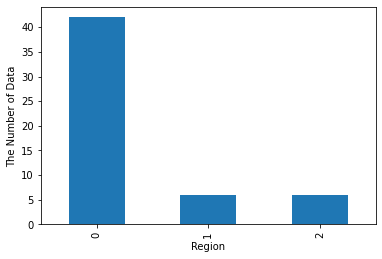

In [ ]:
#지역별 데이터 수를 시각화료 표현
labels = ["Others", "Seoul", "Gyeonggi"]
plt.xticks(range(3), labels)
plt.xlabel("Region")
plt.ylabel("The Number of Data")
data['Class'].value_counts().plot(kind = 'bar')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
del data["지역별"]
del data["시점"]

In [ ]:
#정규화

data=(data - data.min()) / (data.max() - data.min())

In [ ]:
data

건축착공면적[㎡]  건축허가면적증감률[%]  고용률(시도)[%]   실업률(시도)  소비자물가지수[2015=100]  \
0    0.164302      0.606989    0.352288  0.814714           0.000000   
1    0.104309      0.231373    0.350902  0.817439           0.197710   
2    0.149387      1.000000    0.392510  0.923706           0.536303   
3    0.122651      0.000000    0.294036  1.000000           0.767802   
4    0.126757      0.497691    0.357836  0.877384           0.871125   
5    0.170359      0.459821    0.242718  0.934605           0.980732   
6    1.000000      0.962746    0.635229  0.730245           0.000279   
7    0.980067      0.277786    0.631068  0.722071           0.157777   
8    0.815527      0.192734    0.711512  0.708447           0.497487   
9    0.739648      0.296721    0.683773  0.689373           0.753840   
10   0.640749      0.177340    0.668516  0.686649           0.824909   
11   0.818234      0.531943    0.406380  0.735695           0.931723   
12   0.009182      0.875308    0.000000  0.509537           0.000140   
13   0.046527      0.665871    0.056865  0.378747           0.131807   
14   0.024723      0.420874    0.522885  0.307902           0.469562   
15   0.022575      0.526170    0.470180  0.403270           0.743787   
16   0.000000      0.078664    0.730929  0.634877           0.890673   
17   0.000037      0.268319    0.485437  0.741144           1.000000   
18   0.063980      0.809729    0.751734  0.299728           0.000000   
19   0.040816      0.440656    0.685160  0.299728           0.095085   
20   0.042183      0.332435    0.785021  0.177112           0.431723   
21   0.041672      0.563732    0.902913  0.245232           0.713488   
22   0.017851      0.050416    0.834951  0.441417           0.777716   
23   0.032516      0.387007    0.886269  0.487738           0.868193   
24   0.130807      0.585283    0.730929  0.569482           0.000000   
25   0.077094      0.248461    0.639390  0.485014           0.115191   
26   0.079310      0.306034    0.736477  0.378747           0.442195   
27   0.082675      0.521167    0.945908  0.452316           0.687936   
28   0.061167      0.151247    0.963939  0.381471           0.671600   
29   0.084431      0.292719    0.757282  0.577657           0.786791   
30   0.008703      0.708051    0.216366  0.000000           0.000000   
31   0.015908      0.575046    0.346741  0.119891           0.090338   
32   0.029552      0.241302    0.124827  0.264305           0.402541   
33   0.018363      0.432189    0.073509  0.332425           0.695755   
34   0.020172      0.304187    0.246879  0.326975           0.750070   
35   0.018114      0.291949    0.345354  0.256131           0.843898   
36   0.025314      0.406558    0.825243  0.277929           0.000000   
37   0.029656      0.565194    0.800277  0.427793           0.157777   
38   0.050305      0.356373    0.705964  0.485014           0.516057   
39   0.043511      0.438808    0.760055  0.351499           0.775063   
40   0.062157      0.469135    0.925104  0.277929           0.833426   
41   0.069878      0.248461    1.000000  0.217984           0.957414   
42   0.137043      0.573276    0.748960  0.438692           0.000000   
43   0.109844      0.179957    0.755895  0.479564           0.114912   
44   0.061269      0.162254    0.765603  0.348774           0.427534   
45   0.097646      0.549261    0.621359  0.792916           0.683468   
46   0.049085      0.089440    0.635229  0.724796           0.713488   
47   0.070703      0.212131    0.545076  0.765668           0.735409   
48   0.128658      0.334591    0.452150  0.307902           0.000279   
49   0.193073      0.624307    0.454924  0.539510           0.155404   
50   0.079674      0.057189    0.503467  0.403270           0.426696   
51   0.038352      0.115610    0.586685  0.433243           0.663781   
52   0.019954      0.351678    0.568655  0.675749           0.678023   
53   0.038041      0.281327    0.453537  0.754768           0.785954   

    아파트매매가격지수  아파트전세가격지수[2017.11 = 100.0]  